In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Import Twitter Access Keys

from credentials import * #Allow us to use the keys as variables

#API setup

def twitter_setup():

    """
    Utility function to setup Twitter's API 
    with our access keys provided.
    """
    #Authentication and access using keys, the below is basically creating an OAuthInstance that has our information that wil automatically log us in.
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    #Return API with authentication
    api = tweepy.API(auth)
    return api




In [3]:

#Create an extractor object:
#(I think this basically means that we use 
#the twitter_setup to log in and extract information)
extractor = twitter_setup()
    
#Create a tweet list:
#User_timeline returns the most 20 recent statuses from the user specified
#and has multiple parameters
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
#Using format as below allows you to put numbers in a character string
print("Number of tweets extracted: {}.\n".format(len(tweets)))
    
#We print the most recent 5 tweets:
#\n is a new line
print("5 recent tweets:\n")
#prints in the range up to 5 for tweets
for tweet in tweets[:5]:
    print(tweet.text)
    print()

#We create a pandas dataframe as follows

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns = ['Tweets'])

#We display the first 10 elements of the dataframe:
display(data.head(10))


Number of tweets extracted: 200.

5 recent tweets:

How does Da Nang Dick (Blumenthal) serve on the Senate Judiciary Committee when he defrauded the American people ab… https://t.co/JBKLZ66qx6

In the beautiful Midwest, windchill temperatures are reaching minus 60 degrees, the coldest ever recorded. In comin… https://t.co/FnaCaBA5Nz

“In the Media’s effort to destroy the President, they are actually destroying themselves. Given all of the tremendo… https://t.co/yXteAEPz17

Howard Schultz doesn’t have the “guts” to run for President! Watched him on @60Minutes last night and I agree with… https://t.co/aSYufhX25J

Numerous states introducing Bible Literacy classes, giving students the option of studying the Bible. Starting to make a turn back? Great!



,Tweets
0,How does Da Nang Dick (Blumenthal) serve on th...
1,"In the beautiful Midwest, windchill temperatur..."
2,“In the Media’s effort to destroy the Presiden...
3,Howard Schultz doesn’t have the “guts” to run ...
4,Numerous states introducing Bible Literacy cla...
5,Tariffs on the “dumping” of Steel in the Unite...
6,"After all that I have done for the Military, o..."
7,Never thought I’d say this but I think @johnro...
8,BUILD A WALL &amp; CRIME WILL FALL! https://t....
9,#HolocaustMemorialDay\nhttps://t.co/zBQjfUOdtj...


In [4]:
#Internal methods and metadata contained in a Tweet object in tweepy
print(dir(tweets[0]))

print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']
1090078588748087296
2019-01-29 02:46:02
Twitter for iPhone
56786
14747
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/JBKLZ66qx6', 'exp

In [5]:
#Add metadata to Dataframe

data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

#Display of first 10 elements from data frame
display(data.head(10))



,Tweets,len,ID,Date,Source,Likes,RTs
0,How does Da Nang Dick (Blumenthal) serve on th...,140,1090078588748087296,2019-01-29 02:46:02,Twitter for iPhone,56786,14747
1,"In the beautiful Midwest, windchill temperatur...",140,1090074254010404864,2019-01-29 02:28:49,Twitter for iPhone,72753,18290
2,“In the Media’s effort to destroy the Presiden...,140,1089883338758914048,2019-01-28 13:50:11,Twitter for iPhone,94070,21481
3,Howard Schultz doesn’t have the “guts” to run ...,139,1089881244312178688,2019-01-28 13:41:52,Twitter for iPhone,88654,18819
4,Numerous states introducing Bible Literacy cla...,138,1089876055224184833,2019-01-28 13:21:15,Twitter for iPhone,189860,41345
5,Tariffs on the “dumping” of Steel in the Unite...,140,1089874871247687683,2019-01-28 13:16:32,Twitter for iPhone,103035,23565
6,"After all that I have done for the Military, o...",143,1089691985164800001,2019-01-28 01:09:49,Twitter for iPhone,209140,45113
7,Never thought I’d say this but I think @johnro...,140,1089691564283183105,2019-01-28 01:08:09,Twitter for iPhone,82970,18336
8,BUILD A WALL &amp; CRIME WILL FALL! https://t....,59,1089589587456991233,2019-01-27 18:22:55,Twitter for iPhone,113082,32713
9,#HolocaustMemorialDay\nhttps://t.co/zBQjfUOdtj...,69,1089584983415627776,2019-01-27 18:04:38,Twitter for iPhone,62743,14630


In [6]:
#We extract the mean of lengths

mean = np.mean(data['len'])

print("The length's average in tweets: {}".format(mean))

#We extract the tweet with more FAVs and more RTs:
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

#Max FAVs:

print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

#Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))


                     

The length's average in tweets: 123.33
The tweet with more likes is: 
BUILD A WALL &amp; CRIME WILL FALL!
Number of likes: 221974
35 characters.

The tweet with more retweets is: 
The citizens of Venezuela have suffered for too long at the hands of the illegitimate Maduro regime. Today, I have… https://t.co/6pcpLqVzaQ
Number of retweets: 81371
139 characters.



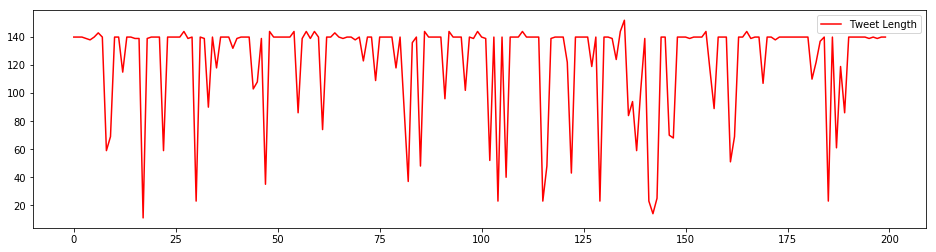

In [7]:
#Pandas Plotting
#Create a time series for data:

tlen = pd.Series(data=data['len'].values)
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

#Lengths along time:

tlen.plot(figsize=(16,4), label = "Tweet Length", color='r', legend = True);





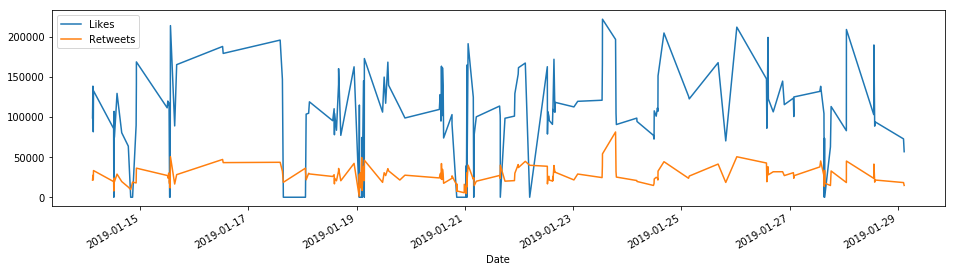

In [8]:
#Likes vs Retweets Visualization
tfav.plot(figsize=(16, 4), label= "Likes", legend=True)
tret.plot(figsize=(16, 4), label="Retweets", legend=True);


Creation of content sources:
*Twitter for iPhone


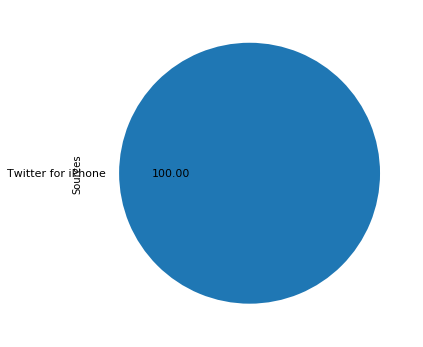

In [9]:
#Piechart of sources

#We obtain all possible sources

sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

#Print sources list
print("Creation of content sources:")
for source in sources:
    print("*{}".format(source))

#Create a numpy vector maped to labels

percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
percent /= 100

#Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6,6));


    

In [10]:
#Sentiment Analysis 

from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean th etext in a tweet by removing
    links and special characters using regex.
    '''
    
    return ' '.join(re.sub("([@A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    analysis = TextBlog(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return 1

#We create a column with the result of the analysis:

data['SA'] = np.array([analyze_sentiment(tweet) for tweet in data ['Tweets']])

#We display the updated dataframe with the new column

display(data.head(10))

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data ['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data ['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data ['SA'][index] < 0]


print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

NameError: name 'TextBlog' is not defined